# Fake News Detector

## Installing Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## Loading the data

In [4]:
data_fake=pd.read_csv('/Users/jindsaini/Fake.csv')
data_true=pd.read_csv('/Users/jindsaini/True.csv')

### Data Preview 

In [5]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [29]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [6]:
data_fake["class"]=0
data_true['class']=1

In [7]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [8]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)
    
    

In [33]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [9]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

/var/folders/ff/bwt99j7j1kzd2cz8ck216vm00000gp/T/ipykernel_16069/1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
/var/folders/ff/bwt99j7j1kzd2cz8ck216vm00000gp/T/ipykernel_16069/1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [35]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [36]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [10]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [11]:
data_merge_og=pd.concat([data_fake, data_true], axis = 0)
data_merge_og.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
missing_values = data_merge.isnull().sum()
print(missing_values)

title      0
text       0
subject    0
date       0
class      0
dtype: int64


In [40]:
import plotly.express as px
print(data_merge['subject'].unique())
sub_check=data_merge.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by Subject')
fig.show()


['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east'
 'politicsNews' 'worldnews']


In [41]:
label_encoder = LabelEncoder()

for column in data_merge.columns:
    data_merge[column] = label_encoder.fit_transform(data_merge[column])

# Compute the correlation matrix
correlation_matrix = data_merge.corr()

In [42]:
print(correlation_matrix)

            title      text   subject      date     class
title    1.000000  0.102653  0.502358  0.075145  0.400056
text     0.102653  1.000000  0.056092 -0.034795  0.104055
subject  0.502358  0.056092  1.000000  0.221284  0.816149
date     0.075145 -0.034795  0.221284  1.000000  0.223501
class    0.400056  0.104055  0.816149  0.223501  1.000000


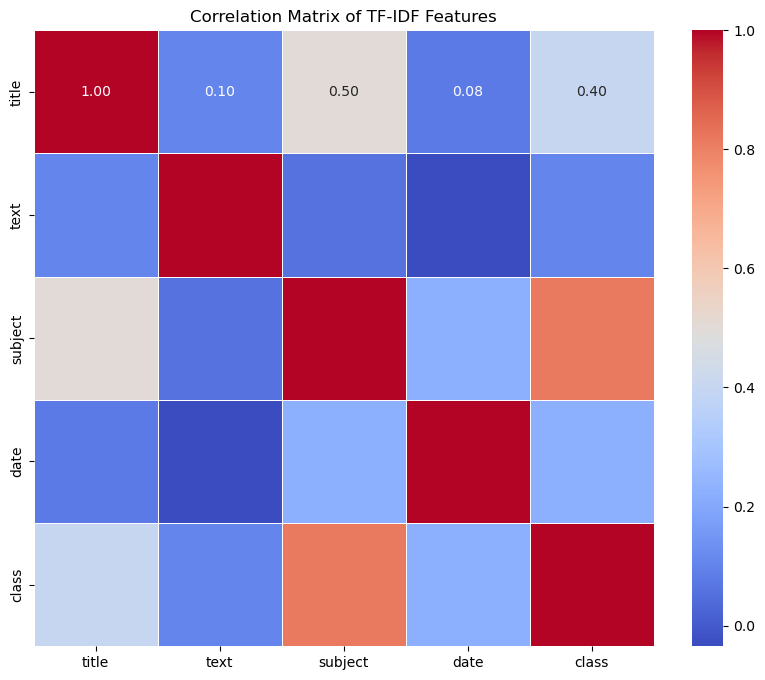

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of TF-IDF Features')
plt.show()

<b> subject with title has high corr, and subject with class has high corr . So title dropped and text is kept 

In [13]:
data=data_merge_og.drop(['date'], axis = 1)

In [14]:
#count of missing values
data.isnull().sum() 

title      0
text       0
subject    0
class      0
dtype: int64

#### Randomly shuffling the dataframe 

In [15]:
data = data.sample(frac = 1)

In [47]:
data.head()

,title,text,subject,class
1217,U.S. Senator Menendez's corruption trial to pr...,"NEWARK, N.J. (Reuters) - The bribery case agai...",politicsNews,1
12793,Japan's Oxford-educated crown prince to bring ...,TOKYO (Reuters) - Japan s Oxford-educated crow...,worldnews,1
13028,China says Trump plan to move embassy in Israe...,BEIJING (Reuters) - China expressed concern on...,worldnews,1
13521,HOW HILLARY’S ANTI-COP Past And Support For Vi...,Maybe the Left became a bit too optimistic aft...,politics,0
20231,SANDERS SUPPORTERS Ready To Raise Hell At DNC ...,Wow! What a week for the Democrats! Nothing li...,left-news,0


In [16]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [17]:
data.columns

Index(['title', 'text', 'subject', 'class'], dtype='object')

In [50]:
data.head()

,title,text,subject,class
0,U.S. Senator Menendez's corruption trial to pr...,"NEWARK, N.J. (Reuters) - The bribery case agai...",politicsNews,1
1,Japan's Oxford-educated crown prince to bring ...,TOKYO (Reuters) - Japan s Oxford-educated crow...,worldnews,1
2,China says Trump plan to move embassy in Israe...,BEIJING (Reuters) - China expressed concern on...,worldnews,1
3,HOW HILLARY’S ANTI-COP Past And Support For Vi...,Maybe the Left became a bit too optimistic aft...,politics,0
4,SANDERS SUPPORTERS Ready To Raise Hell At DNC ...,Wow! What a week for the Democrats! Nothing li...,left-news,0


In [51]:
data['subject'].nunique()

8

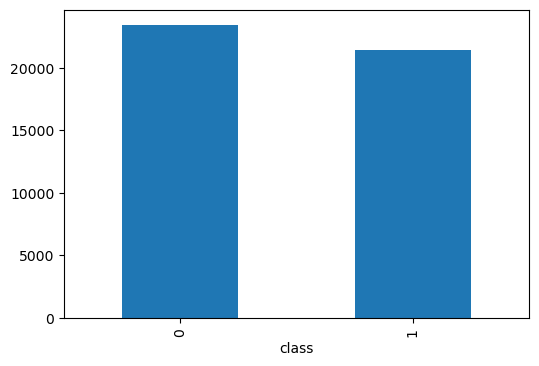

In [52]:
 plt.figure(figsize=(6, 4))
data['class'].value_counts().plot(kind='bar')
plt.show()

## Preprocessing Text

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [18]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [19]:
data['text'] = data['text'].apply(wordopt)
data['subject'] = data['subject'].apply(wordopt)
data['title']= data['title'].apply(wordopt)

In [20]:
data['content'] = data['text']+' '+ data['subject']

In [21]:
data

,title,text,subject,class,content
0,despite showman reputation trump inauguration...,washington reuters donald trump made his n...,politicsnews,1,washington reuters donald trump made his n...
1,white house staffer admits this s s hard...,it is no secret that president donald trump et...,news,0,it is no secret that president donald trump et...
2,turkey pm confirms iraqi government in control...,ankara reuters iraq s central government h...,worldnews,1,ankara reuters iraq s central government h...
3,trump campaign manager registering as foreign...,donald trump s former campaign chairman paul ...,news,0,donald trump s former campaign chairman paul ...
4,wasserman schultz will not open democratic con...,washington reuters democratic national com...,politicsnews,1,washington reuters democratic national com...
...,...,...,...,...,...
44873,trump postpones new hampshire rally over shoot...,washington reuters republican presidential...,politicsnews,1,washington reuters republican presidential...
44874,danish police charge syrian man with attempted...,copenhagen reuters danish police have char...,worldnews,1,copenhagen reuters danish police have char...
44875,fox news correspondent arrested for rape and ...,since sexual harassment is almost a sport at f...,news,0,since sexual harassment is almost a sport at f...
44876,highlights the trump presidency on march at ...,reuters highlights of the day for u s pre...,politicsnews,1,reuters highlights of the day for u s pre...


#### Defining dependent and independent variable as x and y

In [22]:
x = pd.DataFrame()
y = pd.DataFrame()

In [23]:
x['content'] = data['content']
x['title']=data['title']
y['class'] = data['class']

In [24]:
x

,content,title
0,washington reuters donald trump made his n...,despite showman reputation trump inauguration...
1,it is no secret that president donald trump et...,white house staffer admits this s s hard...
2,ankara reuters iraq s central government h...,turkey pm confirms iraqi government in control...
3,donald trump s former campaign chairman paul ...,trump campaign manager registering as foreign...
4,washington reuters democratic national com...,wasserman schultz will not open democratic con...
...,...,...
44873,washington reuters republican presidential...,trump postpones new hampshire rally over shoot...
44874,copenhagen reuters danish police have char...,danish police charge syrian man with attempted...
44875,since sexual harassment is almost a sport at f...,fox news correspondent arrested for rape and ...
44876,reuters highlights of the day for u s pre...,highlights the trump presidency on march at ...


In [25]:
y

,class
0,1
1,0
2,1
3,0
4,1
...,...
44873,1
44874,1
44875,0
44876,1


## Training the model

#### Splitting the dataset into training set and testing set. 

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [27]:
x_train

,content,title
27091,washington reuters contractors likely brea...,cia contractors likely source of latest wikile...
28922,it s nice to see freedom of speech is alive an...,dems tell kanye west to shut up and sing bann...
35536,seoul reuters north korea said u s b bom...,north korea says u s bombers staged surprise...
16621,london reuters britain s opposition labour...,britain s labour says may should consider keep...
33,dorothy woods the wife of an ex navy seal kil...,benghazi widow hits back at hillary s heartles...
...,...,...
11284,did america really expect this racist communi...,breaking obama s war on cops another cop ambu...
44732,if ever there was a reminder that sen ted cru...,ted cruz has a sickening new plan for america...
38158,president obama held a cnn televised town hall...,president obama to critics of his tearful add...
860,ottawa reuters canadian diplomats are fann...,canada works to counter protectionist mood of ...


In [63]:
y_train

,class
27091,0
28922,1
35536,0
16621,0
33,1
...,...
11284,0
44732,0
38158,1
860,1


### Extracting Features from the Text

#### Convert text to vectors

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train['content']+x_train['title'])
xv_test = vectorization.transform(x_test['content'])

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
print(xv_train)

  (0, 68642)	0.041931378608151236
  (0, 85094)	0.018660376730730902
  (0, 55194)	0.014093499613803337
  (0, 49404)	0.021585142126392634
  (0, 40845)	0.031248674822269177
  (0, 17560)	0.024674776809084194
  (0, 37211)	0.006364777600612024
  (0, 98777)	0.008609381904035858
  (0, 67594)	0.013765435310855409
  (0, 91875)	0.01681323206859898
  (0, 28084)	0.017143546586510808
  (0, 8186)	0.02290373564827502
  (0, 81827)	0.025745239602703935
  (0, 54130)	0.014998765786953434
  (0, 37746)	0.010918866997741502
  (0, 52500)	0.016137337397331124
  (0, 97083)	0.01738307828039876
  (0, 79953)	0.020238771847231326
  (0, 54582)	0.022786889065363206
  (0, 3408)	0.022729581029787452
  (0, 14126)	0.02260323833254513
  (0, 66019)	0.03035589769622511
  (0, 85003)	0.02098597570576272
  (0, 822)	0.022487077337300466
  (0, 18986)	0.017826507439318448
  :	:
  (35901, 23932)	0.013005300953864377
  (35901, 71160)	0.022563191330571084
  (35901, 90041)	0.023801058884586113
  (35901, 99566)	0.017144797115900074
  

In [67]:
print("Feature Shape:", xv_train.shape)  # Shows (rows, columns)


Feature Shape: (35902, 103287)


In [149]:
y_train

,class
27091,0
28922,1
35536,0
16621,0
33,1
...,...
11284,0
44732,0
38158,1
860,1


In [69]:
#y_train = y_train.values.ravel()  # Convert to NumPy array and flatten

In [31]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
pred_lr = LR.predict(xv_test)

In [33]:
LR.score(xv_train, y_train)

0.992228845189683

In [34]:
LR.score(xv_test, y_test)

0.9871880570409982

In [35]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.98      0.99      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



## Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [37]:
pred_dt = DT.predict(xv_test)

In [38]:
DT.score(xv_train, y_train)

1.0

In [39]:
DT.score(xv_test, y_test)

0.9945409982174688

In [40]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.98      0.99      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



## Gradient Boost Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

In [42]:
pred_gb = GB.predict(xv_test)

In [43]:
GB.score(xv_test, y_test)

0.9939839572192514

In [44]:
GB.score(xv_train, y_train)

0.9976602974764637

In [45]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4715
           1       0.99      1.00      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



## Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

/var/folders/ff/bwt99j7j1kzd2cz8ck216vm00000gp/T/ipykernel_16069/3266510754.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(xv_train, y_train)


RandomForestClassifier(random_state=0)

In [47]:
pred_rf = RF.predict(xv_test)

In [48]:
RF.score(xv_test, y_test)

0.9893048128342246

In [49]:
RF.score(xv_train, y_train)

1.0

In [50]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.99      0.99      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



## Testing the Model

In [51]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

### Model Testing With Manual Entry

In [52]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


In [53]:
news=str(input())
manual_testing(news)



LR Predicition: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction:Not A Fake News


In [54]:
news=str(input())
manual_testing(news)




LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


In [55]:
news=str(input())
manual_testing(news)




LR Predicition: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction:Not A Fake News


## Reduce overfitting

In [61]:
# Logistic Regression with Lasso (L1) and Ridge (L2) Regularization
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.15)
lr_l1.fit(xv_train, y_train)
y_pred_l1 = lr_l1.predict(xv_test)
print("Lasso Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l1))

lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.15)
lr_l2.fit(xv_train, y_train)
y_pred_l2 = lr_l2.predict(xv_test)
print("Ridge Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_l2))
print(classification_report(y_test, y_pred_l2))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso Logistic Regression Accuracy: 0.9910873440285205
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.99      0.99      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ridge Logistic Regression Accuracy: 0.9751559714795008
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4715
           1       0.97      0.98      0.97      4261

    accuracy                           0.98      8976
   macro avg       0.97      0.98      0.98      8976
weighted avg       0.98      0.98      0.98      8976



In [62]:
from sklearn.metrics import accuracy_score, classification_report
import math

# Lasso
train_pred_l1 = lr_l1.predict(xv_train)
train_acc_l1 = accuracy_score(y_train, train_pred_l1)
test_acc_l1 = accuracy_score(y_test, y_pred_l1)
print("\n Lasso Logistic Regression")
print("Training Accuracy:", train_acc_l1)
print("Testing Accuracy :", test_acc_l1)
print("Overfitting Gap  :", abs(train_acc_l1 - test_acc_l1))
print(classification_report(y_test, y_pred_l1))

# Ridge
train_pred_l2 = lr_l2.predict(xv_train)
train_acc_l2 = accuracy_score(y_train, train_pred_l2)
test_acc_l2 = accuracy_score(y_test, y_pred_l2)
print("\n Ridge Logistic Regression")
print("Training Accuracy:", train_acc_l2)
print("Testing Accuracy :", test_acc_l2)
print("Overfitting Gap  :", train_acc_l2 - test_acc_l2)
print(classification_report(y_test, y_pred_l2))



 Lasso Logistic Regression
Training Accuracy: 0.9913375299426216
Testing Accuracy : 0.9910873440285205
Overfitting Gap  : 0.0002501859141010865
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.99      0.99      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976


 Ridge Logistic Regression
Training Accuracy: 0.9788869700852321
Testing Accuracy : 0.9751559714795008
Overfitting Gap  : 0.0037309986057312283
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4715
           1       0.97      0.98      0.97      4261

    accuracy                           0.98      8976
   macro avg       0.97      0.98      0.98      8976
weighted avg       0.98      0.98      0.98      8976



In [71]:

y_test = y_test.to_numpy().ravel()


In [64]:
y_pred_l2


array([1, 1, 0, ..., 1, 1, 0])

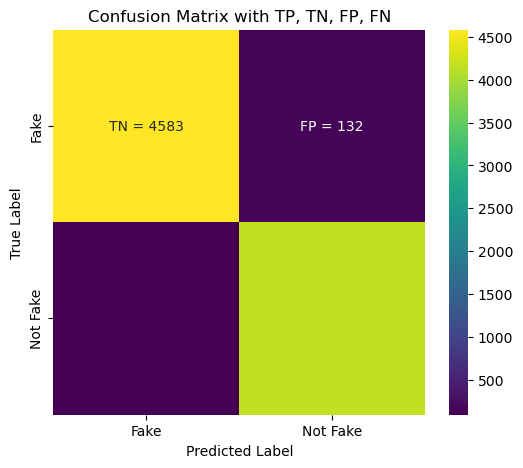

In [72]:
cm = confusion_matrix(list(y_test), y_pred_l2, labels=[0, 1])  # ensure correct order

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
    labels = [[f"TN = {tn}", f"FP = {fp}"], 
              [f"FN = {fn}", f"TP = {tp}"]]

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap='viridis', 
            xticklabels=['Fake', 'Not Fake'], 
            yticklabels=['Fake', 'Not Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with TP, TN, FP, FN')
plt.show()


In [73]:
TP = ((y_test == 1) & (y_pred_l2 == 1)).sum()
TN = ((y_test == 0) & (y_pred_l2 == 0)).sum()
FP = ((y_test == 0) & (y_pred_l2 == 1)).sum()
FN = ((y_test == 1) & (y_pred_l2 == 0)).sum()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")


TP: 4170, TN: 4583, FP: 132, FN: 91


<b> L2 is better , less misclassifications

In [83]:
# Decision Tree with Pruning
dt_p = DecisionTreeClassifier(max_depth=4, min_samples_split=70,min_samples_leaf=150)
dt_p.fit(xv_train, y_train)
y_pred_dt_p = dt_p.predict(xv_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_p))
print(classification_report(y_test, y_pred_dt_p))

Decision Tree Accuracy: 0.9917557932263814
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4715
           1       0.99      1.00      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [75]:
# Then check train vs test performance
train_score = dt_p.score(xv_train, y_train)
test_score = dt_p.score(xv_test, y_test)
print(f"Training score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")
print(f"Gap (overfitting indicator): {train_score - test_score:.4f}")

Training score: 0.9927
Test score: 0.9918
Gap (overfitting indicator): 0.0010


In [79]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=70, min_samples_leaf=150)
dt.fit(xv_train, y_train)
y_pred_dt = dt.predict(xv_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9925356506238859
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.99      0.99      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [104]:
dt_shallow = DecisionTreeClassifier(max_depth=3, min_samples_split=30, min_samples_leaf=50)
dt_shallow.fit(xv_train, y_train)
y_pred_shallow = dt_shallow.predict(xv_test)

print("Decision Tree Accuracy with shallow tree:", accuracy_score(y_test, y_pred_shallow))
print(classification_report(y_test, y_pred_shallow))


Decision Tree Accuracy with shallow tree: 0.991644385026738
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4697
           1       0.99      0.99      0.99      4279

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



<Axes: >

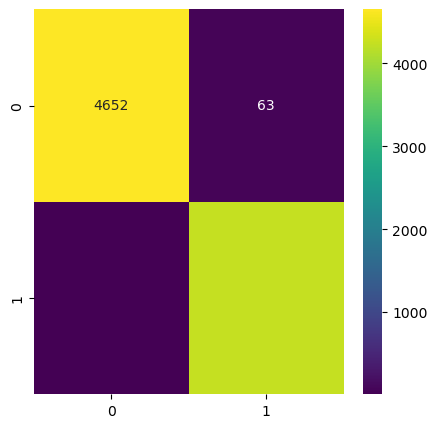

In [84]:
cm = confusion_matrix(list(y_test), y_pred_dt_p)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

In [81]:
TP = ((y_test == 1) & (y_pred_dt_p == 1)).sum()
TN = ((y_test == 0) & (y_pred_dt_p == 0)).sum()
FP = ((y_test == 0) & (y_pred_dt_p == 1)).sum()
FN = ((y_test == 1) & (y_pred_dt_p == 0)).sum()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")


TP: 4250, TN: 4652, FP: 63, FN: 11


<b> since decision tree has very high accuracy we use random forest, gradient boosting
Random Forest reduces overfitting by averaging multiple trees.
Gradient Boosting can refine mistakes from the decision tree.

In [85]:
#Random forest
# Fewer trees with limited depth
rf_clf = RandomForestClassifier(
    n_estimators=70,       # Fewer trees
    max_depth=13,           # Very limited depth
    min_samples_split=150,  # More samples required to split
    max_features='sqrt', class_weight='balanced',  # Limited feature selection
    bootstrap=True,random_state=42
)

rf_clf.fit(xv_train, y_train)
y_pred_rf_ridge = rf_clf.predict(xv_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_ridge))
print(classification_report(y_test, y_pred_rf_ridge))

/var/folders/ff/bwt99j7j1kzd2cz8ck216vm00000gp/T/ipykernel_16069/3430989590.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(xv_train, y_train)


Random Forest Accuracy: 0.9699197860962567
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4715
           1       0.96      0.98      0.97      4261

    accuracy                           0.97      8976
   macro avg       0.97      0.97      0.97      8976
weighted avg       0.97      0.97      0.97      8976



In [86]:
# Then check train vs test performance
train_score = rf_clf.score(xv_train, y_train)
test_score = rf_clf.score(xv_test, y_test)
print(f"Training score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")
print(f"Gap (overfitting indicator): {train_score - test_score:.4f}")

Training score: 0.9741
Test score: 0.9699
Gap (overfitting indicator): 0.0042


<Axes: >

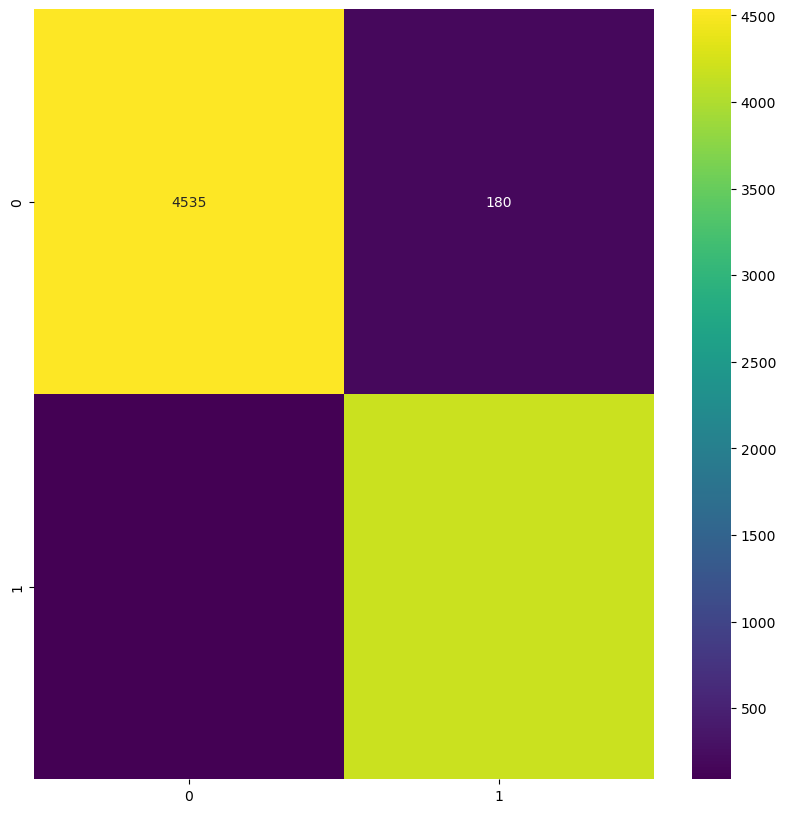

In [87]:
cm = confusion_matrix(list(y_test), y_pred_rf_ridge)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

In [88]:
TP = ((y_test == 1) & (y_pred_rf_ridge == 1)).sum()
TN = ((y_test == 0) & (y_pred_rf_ridge == 0)).sum()
FP = ((y_test == 0) & (y_pred_rf_ridge == 1)).sum()
FN = ((y_test == 1) & (y_pred_rf_ridge == 0)).sum()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")


TP: 4171, TN: 4535, FP: 180, FN: 90


<b> You should prioritize reducing FP as our goal is to prevent fake news from being trusted.

In [89]:
# Very slow learning with shallow trees
gb_clf = GradientBoostingClassifier(
    n_estimators=50,      # Fewer boosting stages
    learning_rate=0.01,   # Very slow learning rate
    max_depth=4,          # Extremely shallow trees
    subsample=0.7,        # Use only 70% of samples for each tree
    min_samples_split=30  # Require more samples to split
)

gb_clf.fit(xv_train, y_train)
y_pred_gb = gb_clf.predict(xv_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy: 0.9932040998217468
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4715
           1       0.99      1.00      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [90]:
# Then check train vs test performance
train_score = gb_clf.score(xv_train, y_train)
test_score = gb_clf.score(xv_test, y_test)
print(f"Training score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")
print(f"Gap (overfitting indicator): {train_score - test_score:.4f}")

Training score: 0.9955
Test score: 0.9932
Gap (overfitting indicator): 0.0023


<Axes: >

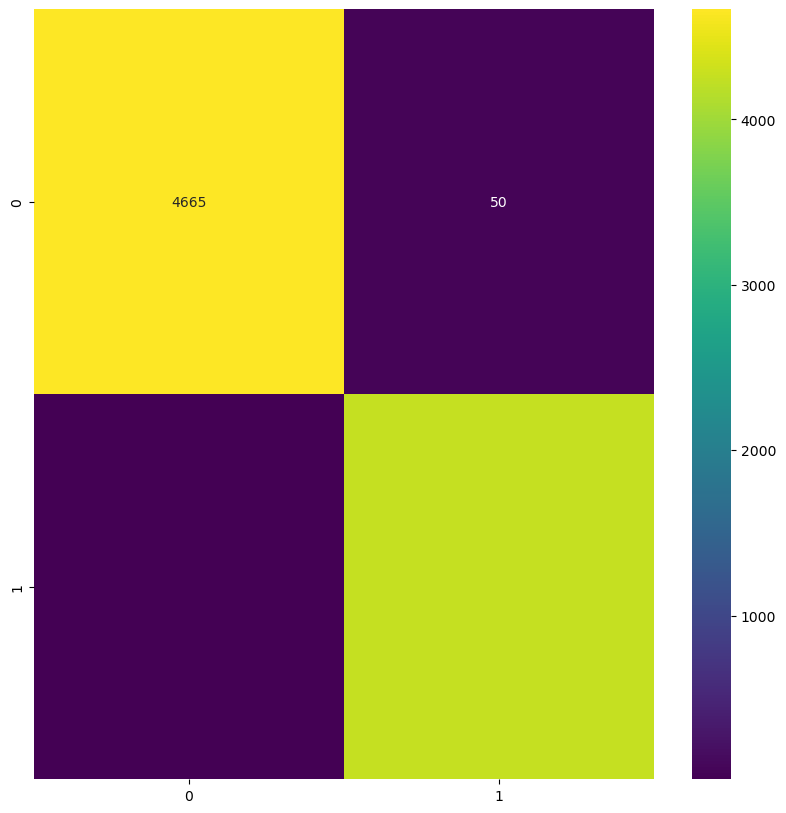

In [91]:
cm = confusion_matrix(list(y_test), y_pred_gb)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

In [92]:
TP = ((y_test == 1) & (y_pred_gb == 1)).sum()
TN = ((y_test == 0) & (y_pred_gb == 0)).sum()
FP = ((y_test == 0) & (y_pred_gb == 1)).sum()
FN = ((y_test == 1) & (y_pred_gb == 0)).sum()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

TP: 4250, TN: 4665, FP: 50, FN: 11


# Testing model

In [93]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lr_l1.predict(new_xv_test)
    pred_DT = dt_p.predict(new_xv_test)
    pred_GB = gb_clf.predict(new_xv_test)
    pred_RF = rf_clf.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

In [94]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


In [95]:
news = str(input()) 
manual_testing(news)



LR Predicition: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction:Not A Fake News


In [96]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Not A Fake News


In [97]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction:Not A Fake News


In [98]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Not A Fake News


<b> best result from fine-tuning each individually

## k-fold and feature selection

In [121]:
xv_train.shape


(35902, 103287)

<b> 87,423 features with 26,926 samples, which is extremely high-dimensional. This can lead to overfitting and slow training. We'll apply feature selection before training models.

In [100]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2

from sklearn.model_selection import KFold, cross_val_score


vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train['content'])
xv_test = vectorization.transform(x_test['content'])

# Get feature names (words)
feature_names = np.array(vectorization.get_feature_names_out())

# Perform Chi-Square test to find important features
selector = SelectKBest(score_func=chi2, k=5000)  # Select top 5000 words
xv_train_selected = selector.fit_transform(xv_train, y_train)
xv_test_selected = selector.transform(xv_test)

# Get selected feature names
selected_features = feature_names[selector.get_support()]
print("Top selected words:", selected_features[:1000])  # Print first 1000 words

Top selected words: ['aaron' 'abadi' 'abbas' 'abbasi' 'abc' 'abcpolitics' 'abd' 'abdel'
 'abdullah' 'abe' 'abedin' 'abid' 'abidjan' 'aboard' 'abortion' 'abortive'
 'about' 'above' 'abroad' 'absolute' 'absolutely' 'abu' 'abuja'
 'abundantly' 'abuses' 'accelerate' 'accent' 'access' 'accession'
 'accidentally' 'accomplishments' 'accord' 'accounts' 'accuracy'
 'accusations' 'accused' 'accuser' 'acknowledge' 'acknowledged' 'acorn'
 'acosta' 'acquisition' 'acquisitions' 'acr' 'acronym' 'activities'
 'actor' 'actress' 'actual' 'actually' 'acute' 'ad' 'added' 'addicting'
 'adding' 'additional' 'address' 'aden' 'adjustment' 'administration'
 'administrators' 'admiral' 'admission' 'admit' 'admits' 'admitted'
 'admitting' 'adopted' 'adult' 'advance' 'advanced' 'advancing' 'adviser'
 'advisers' 'advisor' 'advisory' 'advocacy' 'advocates' 'afari' 'afd'
 'affaires' 'affairs' 'affect' 'affected' 'affleck' 'afghan' 'afghanistan'
 'afraid' 'africa' 'after' 'again' 'against' 'agencies' 'agency' 'agent'


In [101]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Logistic Regression
Training Accuracy: 0.976101609938165
Testing Accuracy: 0.973596256684492
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4715
           1       0.97      0.98      0.97      4261

    accuracy                           0.97      8976
   macro avg       0.97      0.97      0.97      8976
weighted avg       0.97      0.97      0.97      8976



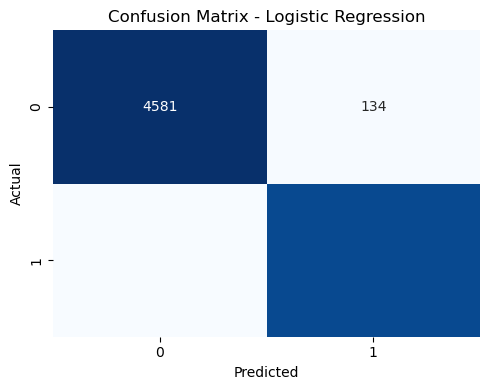

TP: 4158, TN: 4581, FP: 134, FN: 103

 Decision Tree
Training Accuracy: 0.994763522923514
Testing Accuracy: 0.9942067736185384
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4715
           1       0.99      0.99      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



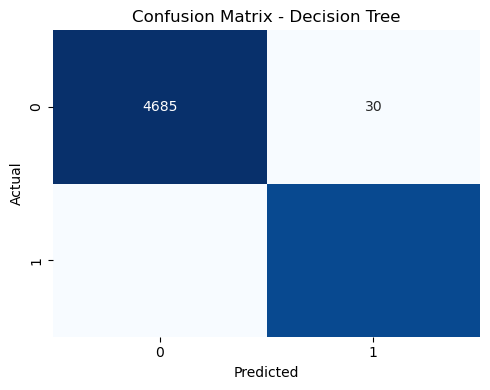

TP: 4239, TN: 4685, FP: 30, FN: 22


/var/folders/ff/bwt99j7j1kzd2cz8ck216vm00000gp/T/ipykernel_16069/1659556593.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xv_train_selected, y_train)



 Random Forest
Training Accuracy: 0.973566932204334
Testing Accuracy: 0.9708110516934046
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4715
           1       0.97      0.97      0.97      4261

    accuracy                           0.97      8976
   macro avg       0.97      0.97      0.97      8976
weighted avg       0.97      0.97      0.97      8976



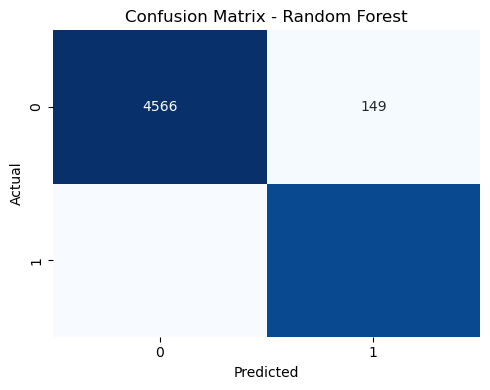

TP: 4148, TN: 4566, FP: 149, FN: 113


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Gradient Boosting
Training Accuracy: 0.9957105453735168
Testing Accuracy: 0.9944295900178253
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4715
           1       0.99      1.00      0.99      4261

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



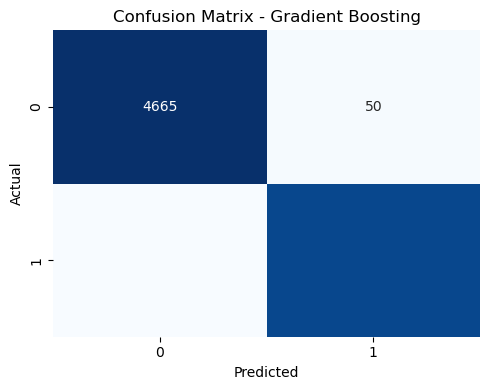

TP: 4261, TN: 4665, FP: 50, FN: 0


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Logistic Regression
lr = LogisticRegression(penalty='l2', solver='liblinear', C=0.1, max_iter=1000)
lr.fit(xv_train_selected, y_train)
y_pred_lr = lr.predict(xv_test_selected)
print("\n Logistic Regression")
print("Training Accuracy:", lr.score(xv_train_selected, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
TP = ((y_test == 1) & (y_pred_lr == 1)).sum()
TN = ((y_test == 0) & (y_pred_lr == 0)).sum()
FP = ((y_test == 0) & (y_pred_lr == 1)).sum()
FN = ((y_test == 1) & (y_pred_lr == 0)).sum()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

# 2. Decision Tree
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=30, min_samples_leaf=100)
dt.fit(xv_train_selected, y_train)
y_pred_dt = dt.predict(xv_test_selected)
print("\n Decision Tree")
print("Training Accuracy:", dt.score(xv_train_selected, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")
TP = ((y_test == 1) & (y_pred_dt == 1)).sum()
TN = ((y_test == 0) & (y_pred_dt == 0)).sum()
FP = ((y_test == 0) & (y_pred_dt == 1)).sum()
FN = ((y_test == 1) & (y_pred_dt == 0)).sum()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=20, max_depth=4, min_samples_split=100, 
                            max_features='sqrt', bootstrap=True, random_state=42)
rf.fit(xv_train_selected, y_train)
y_pred_rf = rf.predict(xv_test_selected)
print("\n Random Forest")
print("Training Accuracy:", rf.score(xv_train_selected, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
TP = ((y_test == 1) & (y_pred_rf == 1)).sum()
TN = ((y_test == 0) & (y_pred_rf == 0)).sum()
FP = ((y_test == 0) & (y_pred_rf == 1)).sum()
FN = ((y_test == 1) & (y_pred_rf == 0)).sum()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

# 4. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, 
                                max_depth=3, random_state=42)
gb.fit(xv_train_selected, y_train)
y_pred_gb = gb.predict(xv_test_selected)
print("\n Gradient Boosting")
print("Training Accuracy:", gb.score(xv_train_selected, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
plot_conf_matrix(y_test, y_pred_gb, "Gradient Boosting")
TP = ((y_test == 1) & (y_pred_gb == 1)).sum()
TN = ((y_test == 0) & (y_pred_gb == 0)).sum()
FP = ((y_test == 0) & (y_pred_gb == 1)).sum()
FN = ((y_test == 1) & (y_pred_gb == 0)).sum()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")


/var/folders/ff/bwt99j7j1kzd2cz8ck216vm00000gp/T/ipykernel_16069/4280871090.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xv_train_selected, y_train)



 Random Forest
Training Accuracy: 0.9697509888028522
Testing Accuracy: 0.9673573975044564
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4715
           1       0.96      0.97      0.97      4261

    accuracy                           0.97      8976
   macro avg       0.97      0.97      0.97      8976
weighted avg       0.97      0.97      0.97      8976



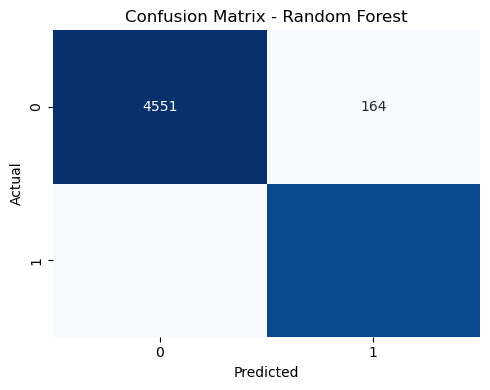

TP: 4132, TN: 4551, FP: 164, FN: 129


In [112]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, min_samples_split=100, 
                            max_features='sqrt', bootstrap=True, random_state=42)
rf.fit(xv_train_selected, y_train)
y_pred_rf = rf.predict(xv_test_selected)
print("\n Random Forest")
print("Training Accuracy:", rf.score(xv_train_selected, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
TP = ((y_test == 1) & (y_pred_rf == 1)).sum()
TN = ((y_test == 0) & (y_pred_rf == 0)).sum()
FP = ((y_test == 0) & (y_pred_rf == 1)).sum()
FN = ((y_test == 1) & (y_pred_rf == 0)).sum()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

In [110]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)

    new_xv_test_selected = selector.transform(new_xv_test)

    # Predictions
    pred_LR = lr.predict(new_xv_test_selected)
    pred_DT = dt.predict(new_xv_test_selected)
    pred_GB = gb.predict(new_xv_test_selected)
    pred_RF = rf.predict(new_xv_test_selected)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

In [113]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


In [114]:
news = str(input()) 
manual_testing(news)



LR Predicition: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction:Not A Fake News


In [115]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


In [116]:
news = str(input()) 
manual_testing(news)



LR Predicition: Not A Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


In [117]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News
